In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("train.csv") 

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mean())

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [8]:
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   #convert shipping dates to pandas datetime format

In [9]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [10]:
#setting the index to be the date will help us a lot later on
df.set_index("Order Date", inplace = True)

In [11]:
Top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20)
Top_customers = Top_customers.round(2)  # Round off Sales values to 2 decimal places
Top_customers = Top_customers.reset_index()  # Reset index without modifying the original Series

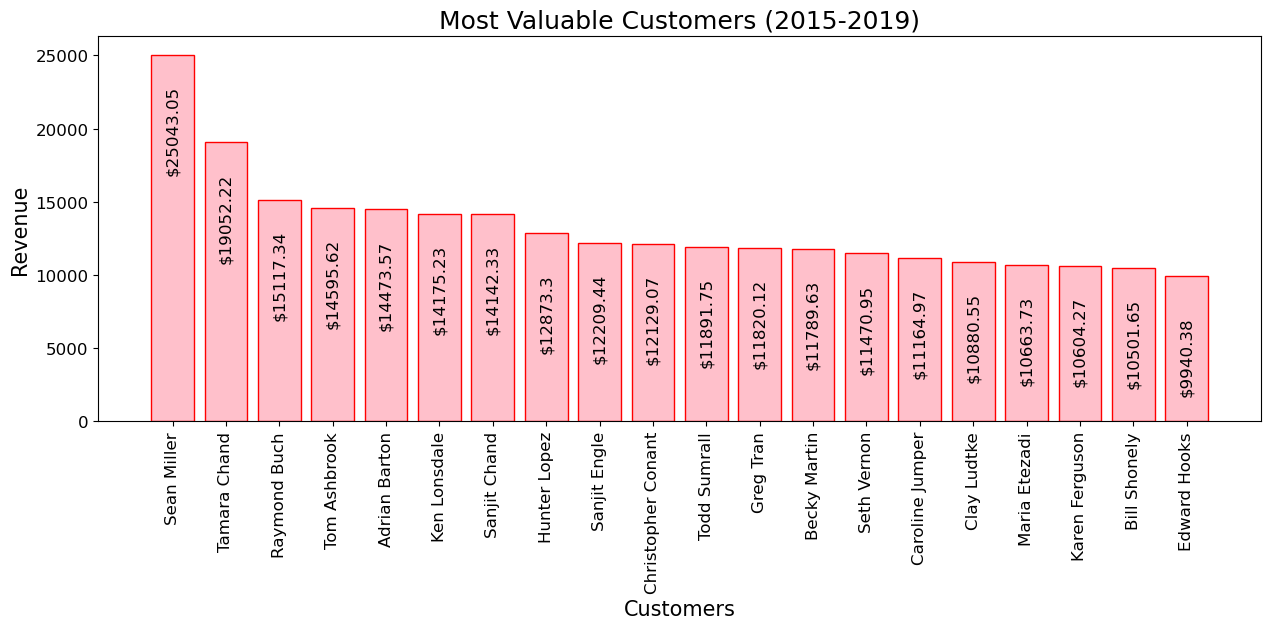

In [12]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Most Valuable Customers (2015-2019)", fontsize=18) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= 'pink',edgecolor='red', linewidth = 1)
plt.xlabel("Customers",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers["Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [13]:
Top_states= df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(20)
Top_states = Top_states.round(2)  
Top_states = Top_states.reset_index()

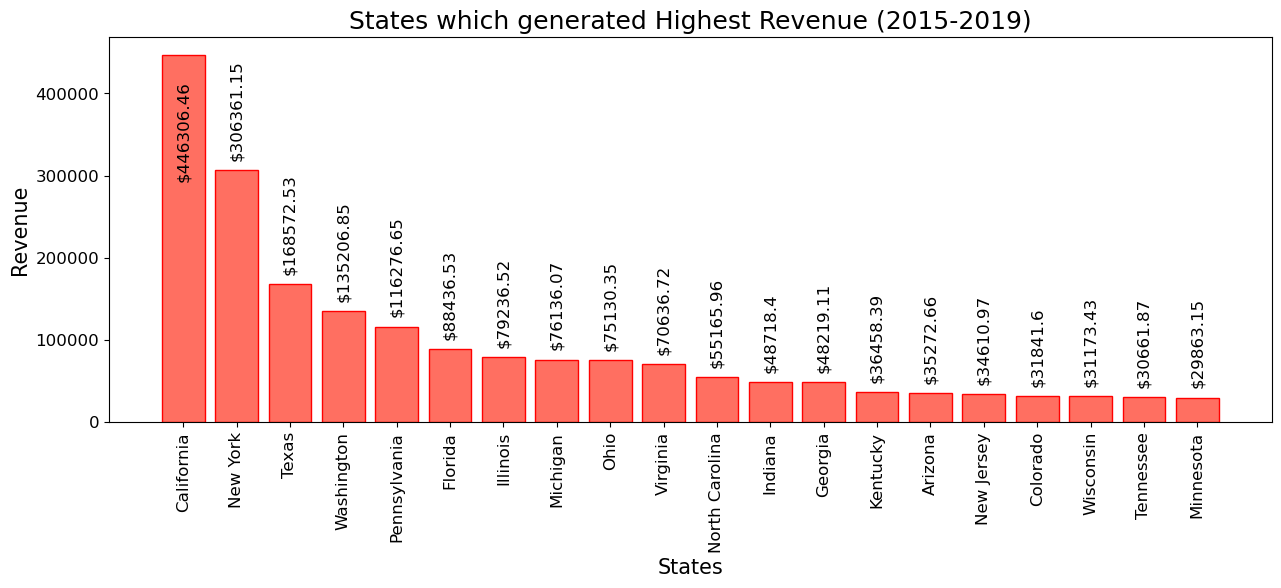

In [14]:
plt.figure(figsize = (15,5))
plt.title("States which generated Highest Revenue (2015-2019)", fontsize=18) 
plt.bar(Top_states["State"], Top_states["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("States",fontsize=15)
plt.ylabel("Revenue",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_states["Sales"].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [18]:
Top_cities= df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(20)
Top_cities = Top_cities.round(2)
Top_cities = Top_cities.reset_index()

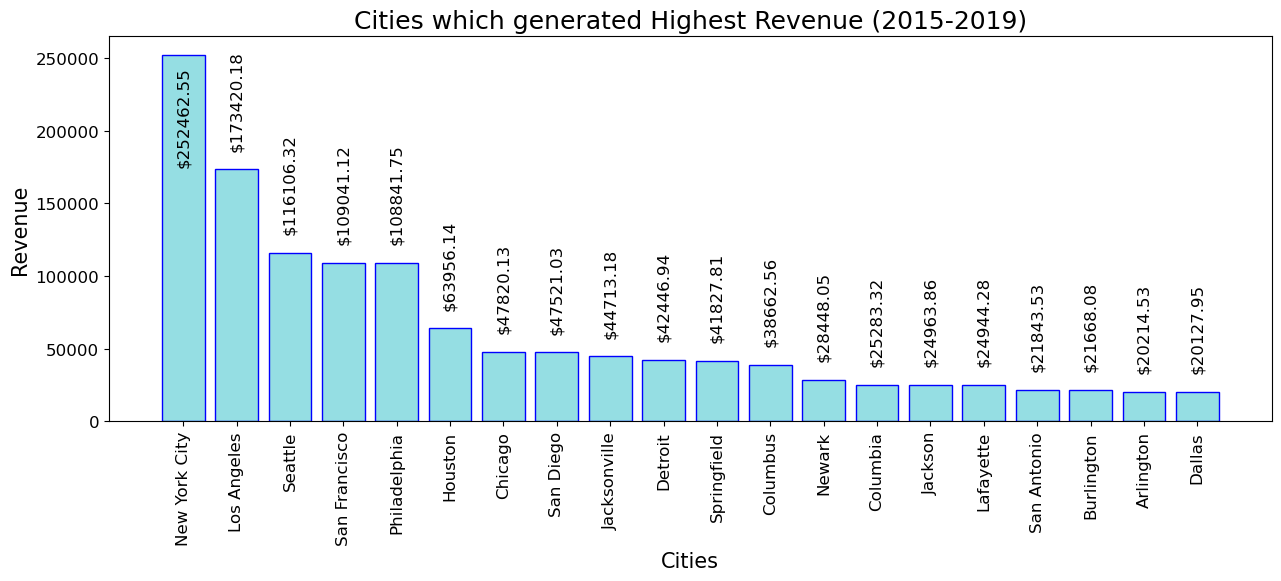

In [19]:
plt.figure(figsize = (15,5))
plt.title("Cities which generated Highest Revenue (2015-2019)", fontsize=18)
plt.bar(Top_cities["City"], Top_cities["Sales"],color= '#95DEE3',edgecolor='blue', linewidth = 1)
plt.xlabel("Cities",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_cities["Sales"].items(): #To show the exact revenue generated on the figure
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [22]:
Top_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
total_revenue_category = Top_category.sum()
total_revenue_category = str(int(total_revenue_category))
total_revenue_category = '$' + total_revenue_category 
Top_category=Top_category.reset_index()

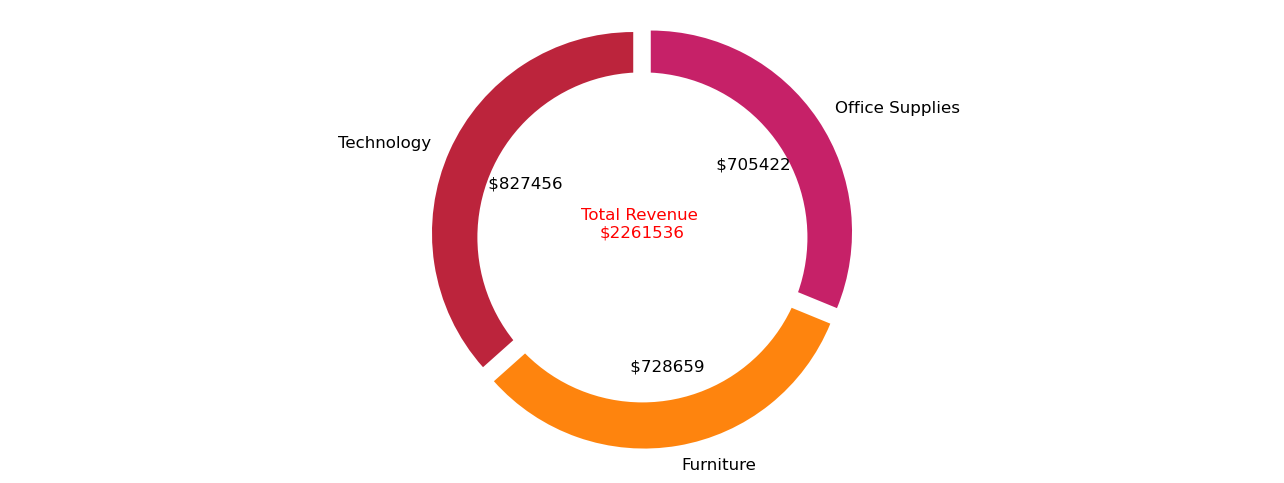

In [23]:
plt.rcParams["figure.figsize"] = (13,5)
plt.rcParams['font.size'] = 12.0 
plt.rcParams['font.weight'] = 6
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] 
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()